<a href="https://colab.research.google.com/github/AntoniaAcevedo/ADA-Informe/blob/main/Informe2_ADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema de Ordenamiento 

**Entrada**: Secuencia de n números $[a_1,a_2,a_3...,a_n]$

**Salida**: Permutación ordenada de la secuencia de entrada: $[a_1',a_2',a_3' ,...,a_n']$, de tal manera que $a_1'\leq a_2' \leq a_3' \leq... \leq a_n'$.

![image](https://i.imgur.com/ehCX5Qd.png)





#2. MergeSort 
El siguiente código muestra una implementación del algoritmo **MergeSort**.

#2.1. Codigo

In [114]:
import random
from termcolor import colored
import copy


def merge(iz,der,verbose=False):
    ordenado = []
    indice_iz = 0
    indice_der = 0
    indice_ordenado = 0
    global i
    while indice_iz < len(iz) and indice_der < len(der):
        izquierda = iz[indice_iz]
        derecha = der[indice_der]
        if izquierda <= derecha:
            ordenado.append(izquierda)  
            indice_iz += 1
            i+=1
            if verbose:
              print("\n Iteracion",i)
              print(colored(f"{str(ordenado)[1:-1]}", "green"), ",", str(derecha)[1:-1])
        else:
            ordenado.append(derecha)
            indice_der += 1
            i+=1
            if verbose:
              print("\n Iteracion",i)
              print(colored(f"{str(ordenado)[1:-1]}", "red"), ",", str(izquierda)[1:-1])
        indice_ordenado += 1
    while indice_iz < len(iz):
        ordenado.append(iz[indice_iz])
        indice_iz+= 1
        i+=1
        if verbose:
          print("\n Iteracion",i)
          print(colored(f"{str(ordenado)[1:-1]}", "blue"))
    while indice_der < len(der):
        ordenado.append(der[indice_der])
        indice_der += 1
        i+=1
        if verbose:
          print("\n Iteracion",i)
          print(colored(f"{str(ordenado)[1:-1]}", "yellow"))
    return ordenado


    
def merge_sort(arreglo,verbose=False):
    longitud = len(arreglo)
    mitad = longitud//2 
    global i
    i=0
    if verbose:
      print("Antes de comenzar")
      print(colored(f"{str(arreglo[:1])[1:-1]}", "magenta"), ",", str(arreglo[1:])[1:-1])
    if longitud <= 1:
        return arreglo
    mit_iz = arreglo[:mitad]
    i+=1
    if verbose:
      print("\n Iteracion",i)
      print(colored(f"{str(mit_iz)[1:-1]}", "green"))
    mit_der = arreglo[mitad:]
    i+=1
    if verbose: 
      print("\n Iteracion",i)    
      print(colored(f"{str(mit_der)[1:-1]}", "red"))
    mit_iz = merge_sort(mit_iz)
    i+=1
    if verbose:
      print("\n Iteracion",i)      
      print(colored(f"{str(mit_iz)[1:-1]}", "blue"))
    mit_der= merge_sort(mit_der)
    i+=1
    if verbose: 
      print("\n Iteracion",i)
      print(colored(f"{str(mit_der)[1:-1]}", "yellow"))   
    i+=1  
    if verbose:
      print("\n Iteracion",i)
      print(colored(f"{str(merge(mit_iz, mit_der))[1:-1]}", "magenta"))
    return merge(mit_iz, mit_der)


# Ejemplo
A = [5,8,7,1,3]
print("Entrada: ",A)
A= merge_sort(A)
print("Salida: ",A)
print("# comparaciones: ", i)

Entrada:  [5, 8, 7, 1, 3]
Salida:  [1, 3, 5, 7, 8]
# comparaciones:  16


#2.2. Descripcion del algoritmo

Uno de los principios de esta funcion es "divide y venceras" con esto en mente se logra entender con mayor facilidad lo que este algoritmo realiza, el cual divide el problema en subproblemas mas pequeños para facilitar la solución de estos. Para esto se implementa la recursividad con la cual funciona, llamandose a si mismo varias veces hasta conseguir lo solicitado, a continuacion mezcla los subproblemas creados formando la solucion del problema original.

La funcion MegeSort para su funcionamiento es necesaria la incorporacion de la funcion Merge, a continuacion dare la descripcion del funcionamiento de cada una de estas.


#2.2.1 Descripcion de funcion MergeSort

Al implementar esta funcion lo primero que hace es dividir el arreglo en 2(izquierda y derecha), luego de esto estas dos partes son divididas nuevamente en 2, asi hasta que el arreglo dividido teniendo 1 valor cada uno. Esto sucede gracias a la recursividad ya que la funcion va a seguir hasta que la condicion de salida se cumpla, al tener el arreglo de 1 esto se facilita. A continuacion se llama a la funcion Merge la cual ordena y guarda en el arreglo de salida que se desea. 

#2.2.2 Descripcion de funcion Merge

Cuando se llama a la funcion Merge dentro de la funcion MergeSort esta toma dos arreglos de 1 comparandolos para encontrar el con el valor mas pequeño esto se realiza con dos indices, al determinar cual es el de menor valor lo guarda en un nuevo arreglo ordenado y asi sucesivamente hasta tener el arreglo completamente ordenado de menor a mayor, luego de esto se regresa a la funcion MergeSort repitiendose el procedimiento por cada par de arreglos, al tener ordenada cada una de las mitades se lograra encontrar un arreglo ordenado de salida.

## 2.3. Ejemplo


#2.4.1 Ejecucion paso a paso funcion MergeSort (verbose=True)


In [118]:
import random
a = random.sample(range(1, 100), 6)
a= merge_sort(a,verbose=True) 
print("# comparaciones: ", i)

Antes de comenzar
77 , 28, 3, 74, 29, 85

 Iteracion 1
77, 28, 3

 Iteracion 2
74, 29, 85

 Iteracion 10
3, 28, 77

 Iteracion 10
29, 74, 85

 Iteracion 11
3, 28, 29, 74, 77, 85
# comparaciones:  23


En un comienzo se muestra como se encuentra el arreglo aleatorio en un inicio, luego de esto en la primera iteracion se muentra la division que se realiza en este arreglo mostrando en un color verde los valores desordenados que se encuentrar en el lado izquierdo del arreglo inicial. En la siguiente iteracion se muestran de color rojo los valores del lado derecho desordenados extraidos del arreglo inicial. 

A continuacion la siguiente iteracion de muentra los valores de color azul los valores de la mitad izquierda ya ordenados de menor a mayor. Continuando con la siguiente iteracion que muestra de color amarillo los valores de la mitad derecha ordenados de menor a mayor. Para finalizar con la ultima iteracion que unifica las mitades en un arreglo de salida deseado con todos los valores ordenados de menor a mayor mostrando consigo tambien el total de iteraciones.

#3. Tiempo de ejecucion
#### **Teorema (Tiempo de ejecución)**.
 *El algoritmo **MergeSort** tiene un tiempo de ejecución de  $O(n log n)$  en **todos los casos**.* 
### **Prueba del Teorema**

El algoritmo utilizado no rectifica antes de comenzar a dividir el problema inicial si este ya se encuentra ordenado por lo que de todas las formas habidas y por haber divide el problema original en subproblemas para luego ordenarlos nuevamente de forma ordenada por lo que en todos los casos sigue los mismos pasos teniendo el mismo tiempo de ejecucion con una ecuacion recurrente.

Una ecuacion recurrente consiste en una expresion finita que define implicitamente una sucesion, en el cual el elemento de la sucesion se determina de otros elementos mas sencillos, que incluyen iniciales o basicos.

Para un algoritmo **"divide y venceras"** lo podemos analizar de la siguiente manera:

####   **A)Si el tamaño del problema es muy pequeño, por ejemplo, de tamaño 1, entonces el tiempo que requerira el algoritmo sera constante, es decir T(N) = O(1).**

####   **B)Para tamaños considerables, suponemos que el algoritmo divide el problema en a subproblemas, cada uno de los cuales es 1/b del problema original. Por lo tanto, podemos decir que el algoritmo demorara a * T(N/b) en resolver los subproblemas relacionados a un problema de tamaño N.**

####  **C)Luego, podemos considerar que el algoritmo demora D(N) en dividir el problema en a subproblemas y C(N) en combinarlos.**
\
Analizando el caso del MergeSort, utilizaremos el tamaño del problema como n para generalizar:

####   **A)MergeSort divide cada problema en a = 2 subproblemas. Cada subproblema es ½ del problema original, es decir b = 2.**
####   **B)Dividir un arreglo en 2 es constante en tiempo por lo tanto D(n) = O(1)**
####   **C)La funcion merge tiene complejidad lineal, por lo tanto C(n) = O(n)**

![image](https://i.imgur.com/AQ2suAV.png)


## **4. Correctitud**
#### **Teorema (Correctitud)**.
*El algoritmo **MergeSort** genera un arreglo:  $[a′_1,a′_2,a'_3,...,a′_n]$ , con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir,  $a′_1\leq a′_2\leq a′_3\leq ...\leq a′_n$ .*
### **Prueba del Teorema**
Para poder conocer la correctitud de la funcion MergeSort es necesario conocer ademas la correctitud de la funcion Merge la cual es llamada en la funcion MergeSort por esto seran explicadas por separado.

Para ver la correctitud del MergSort, usaremos induccion matematica, ya que sirve para probar la correctitud de algoritmos recursivos.Para probar una declaracion T(n) para n perteneciente a los números naturales, debemos:

#### **A)Probar que T(n) para un caso base, por ejemplo T(1)**
#### **B)Probar si T(m) es cierto para m < n, entonces T(n) tambien lo es.**
\
Siguiendo lo descrito anteriormente, nuestra hipotesis T(n) es que MergeSort retorna un arreglo con la secuencia de n elementos de entrada ordenados de menor a mayor.

**Caso base**: *El largo de la lista es 1. De forma algo escasa el arreglo esta ordenado ya que solo posee un elemento y se retorna, por lo tanto el algoritmo funciona.*

**Caso inductivo**: *Supongamos que m = n/2 es correcto que todo m < n, por lo que el algoritmo es correcto. Ahora los subarreglos izquierda y derecha son de tamaño m y son ordenadas usando MergeSort. Como el tamaño de los subarreglos es menor a n, con el paso inductivo asumimos que son ordenadas correctamente. Luego al combinar los dos subarreglos con la función Merge que retorna un arreglo ordenado como vimos anteriormente, el algoritmo MergeSort es correcto.*
\
\
En cambio para la correctitud del Merge vemos que cada iteracion del algoritmo de las listas  izquierda  y derecha estan siempre ordenadas. Si probamos que esta ordenada, demostramos que el algoritmo es correcto. Asi aplicando la propiedad del bucle invariante.

**Inicializacion**: *Los arreglos temporales (izquierda y derecha) estan trivialmente ordenadas ya que estan separados. Por lo que a la primera iteracion estos ya se encuentran ordenados.*

**Mantencion**: *A la i-ésima iteracion ambos arreglos siguen el mismo proceso, por lo que constantemente estan ordenados, asi retornando el arreglo ordenado con todos los elementos originales*


##**5.Experimentos**

### **5.1. Número de comparaciones entre el mejor y peor caso**

#### **Demostración experimental del mejor caso:**

In [119]:
#Mejor caso
a = random.sample(range(1, 100), 1)
print("arreglo de uno:",merge_sort(a))  

arreglo de uno: [8]


#### **Demostración experimental de otros casos:**

In [120]:
import random
#Otro caso
a = random.sample(range(1, 100), 8)
a= merge_sort(a,verbose=True) 
print("# comparaciones: ", i)

Antes de comenzar
74 , 43, 70, 54, 41, 10, 68, 27

 Iteracion 1
74, 43, 70, 54

 Iteracion 2
41, 10, 68, 27

 Iteracion 11
43, 54, 70, 74

 Iteracion 11
10, 27, 41, 68

 Iteracion 12
10, 27, 41, 43, 54, 68, 70, 74
# comparaciones:  28


#### **Gráfica entre comparaciones**

*   Cantidad de comparaciones del mejor caso, realizadas experimentalmente.
*   Cantidad de comparaciones para entradas aleatorias, realizadas experimentalmente.
\

Para tamaños de problemas con $n ∈ [5,99]$.
\
Los arreglos de entrada son:

*   Mejor caso: La secuencia será un arreglo ordenado de $0$.
*   Caso aleatorio: La secuencia será un arreglo aleatorio de números entre 1 y 99, con $n$ cantidad de elementos.

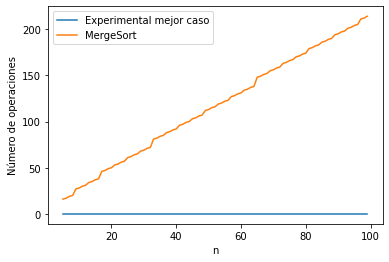

In [122]:
import matplotlib.pyplot as plt

x=[n for n in range(5,100)]

y_best = []
y_mergsort = []

for n in range(5,100):
  c=merge_sort(list(range(0, 1)))
  y_best.append(c) 

  a = random.sample(range(1, 100), n)
  a= merge_sort(a) 
  y_mergsort.append(i)

plt.plot(x,y_best)
plt.plot(x,y_mergsort)
plt.legend(["Experimental mejor caso", "MergeSort"])

plt.xlabel('n')
plt.ylabel('Número de operaciones')
plt.show()


#### **Análisis de resultados**

Como se puede observar en el grafico los arreglos generados aleatoriamente siempre se encuentran sobre la cota inferior del mejor caso ya que al ser recurrente siempre va a estar dentro de ese rango.

Con estos casos experimentativos confirmamos que en cualquier caso se mantiene su tiempo de ejecucion $O(n log n)$.

## 5.2. Tiempo de ejecución (experimental)

En el siguiente grafico se reporta el tiempo de ejecucion del algoritmo **MergeSort** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $500$.


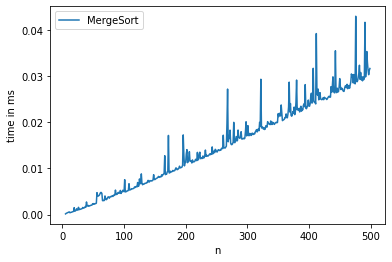

In [123]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces merge_sort con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import merge_sort", stmt=f"merge_sort({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["MergeSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados

En el grafico se puede apreciar, como era de esperarse, que el tiempo de jecucion experimental se comporta de manera creciente en funcion del tamaño del problema (al igual que en el analisis teorico).

Note que hay unos peaks de tiempo. Estos se deben probablemente al comportamiento impredecible de los procesadores y quizas a otros procesos que tambien lo estan ocupando.